In [107]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [108]:
directory = os.getcwd()
print(directory)
df = pd.read_csv("../data/BrentOilPrices.csv")
df.head()

c:\Users\King Betse\Desktop\kifiya-AIM-W10\notebooks


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


## Data Cleaning

### Removing Duplicate

In [109]:
df.drop_duplicates(inplace=True)

df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Handling Missing Values


In [110]:
missing_values = df.isnull().sum()
missing_values


Date     0
Price    0
dtype: int64

### Drop rows with Negative Prices


In [111]:

# df = df[df['Price'] >= 0]
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Handling Outliner

In [112]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['Price'])) < 3)]
upper_limit = df['Price'].quantile(0.95)
lower_limit = df['Price'].quantile(0.05)
df['Price'] = np.where(df['Price'] > upper_limit, upper_limit, df['Price'])
df['Price'] = np.where(df['Price'] < lower_limit, lower_limit, df['Price'])

###  Scale numerical features

In [113]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[['Price']] = scaler.fit_transform(df[['Price']])

# print(df.info())
# print(df.describe())

### Visualize Price Trends


C:\Users\King Betse\AppData\Local\Temp\ipykernel_34552\4223071434.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


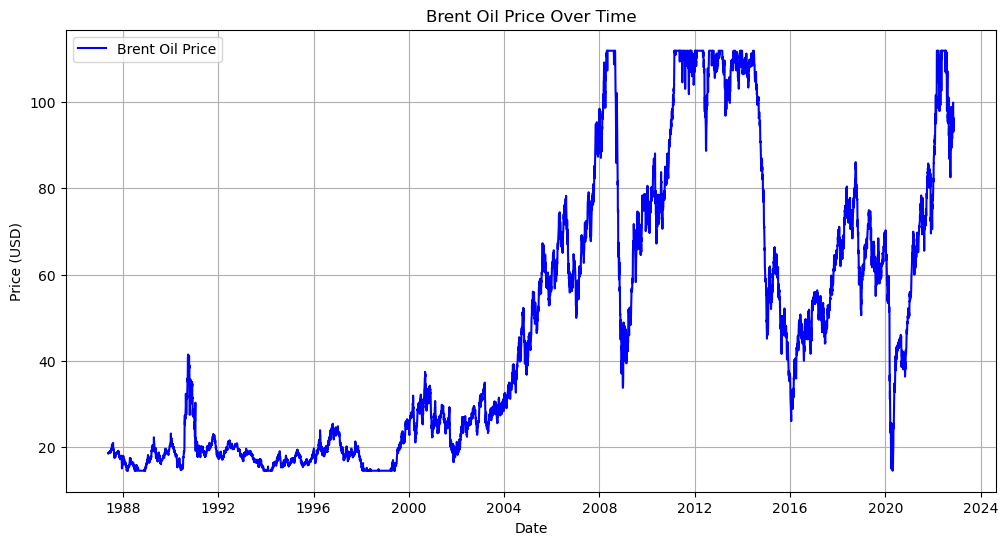

In [114]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if necessary
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the price trend
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

### Unemployment Rates and GDP

In [115]:
# Load unemployment rates and GDP
unemployment_data = pd.read_csv('../data/UNRATE.csv', parse_dates=['Date'])
GDP = pd.read_csv('../data/GDP.csv', parse_dates=['Date'])

# Merge Datasets
merged_data = pd.merge(df, unemployment_data, on='Date', how='inner')
merged_data = pd.merge(merged_data, GDP, on='Date', how='inner')
merged_data.rename(columns={'Price': 'Brent_Oil_Price', 'UNRATE': 'Unemployment_Rate','GDP': 'GDP_Billion'}, inplace=True)
merged_data.head()

,Date,Brent_Oil_Price,Unemployment_Rate,GDP_Billion
0,1987-07-01,18.98,6.1,4884.555
1,1987-10-01,18.50,6.0,5007.994
2,1988-07-01,14.50,5.4,5282.835
3,1990-10-01,38.95,5.9,6004.733
4,1991-04-01,18.00,6.7,6126.862


IndexError: list index out of range

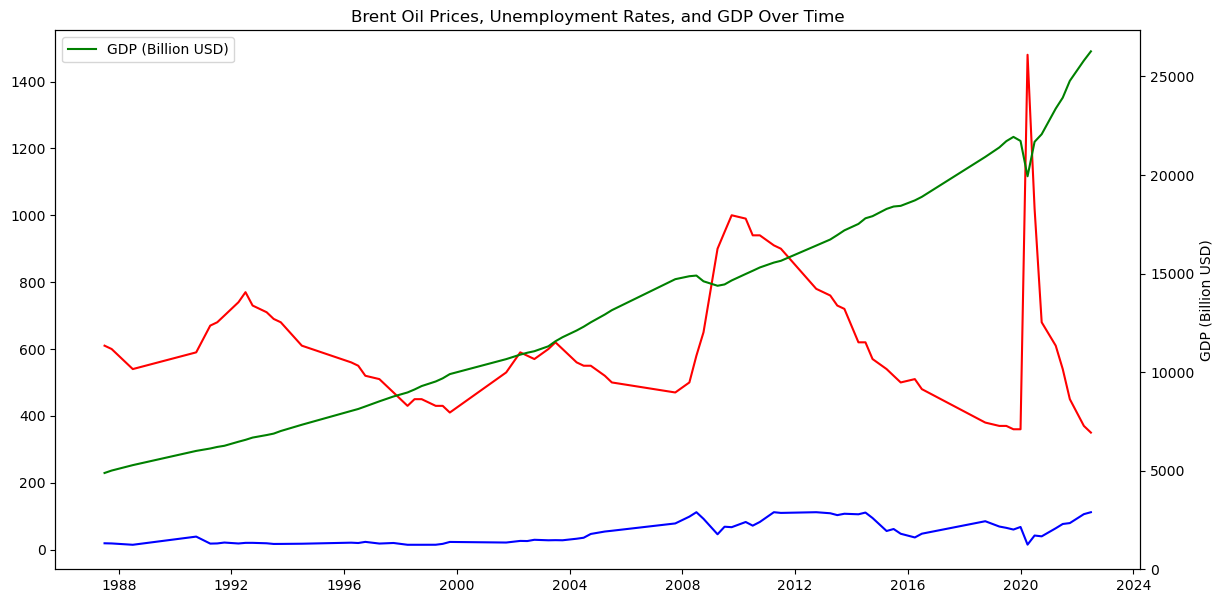

In [116]:
# Plotting
plt.figure(figsize=(14, 7))

# Plot Brent Oil Prices
plt.plot(merged_data['Date'], merged_data['Brent_Oil_Price'], label='Brent Oil Price (USD)', color='blue')

# Create a secondary y-axis for Unemployment Rate
plt.plot(merged_data['Date'], merged_data['Unemployment_Rate'] * 100, label='Unemployment Rate (%)', color='red')  # Scale for better visualization

# Create a twin y-axis for GDP
plt.twinx()  # Create a second y-axis
plt.plot(merged_data['Date'], merged_data['GDP_Billion'], label='GDP (Billion USD)', color='green')

# Formatting the y-axes
plt.ylabel('Brent Oil Price (USD) / Unemployment Rate (%)')
plt.gca().set_ylim(bottom=0)  # Set the lower limit for the primary y-axis
plt.ylabel('GDP (Billion USD)')  # Y label for the secondary y-axis

# Add titles and labels
plt.title('Brent Oil Prices, Unemployment Rates, and GDP Over Time')
plt.xlabel('Date')

# Add legends for both y-axes
plt.legend(loc='upper left')
plt.gca().get_lines()[2].set_label('GDP (Billion USD)')  # Add GDP to the legend
plt.legend(loc='upper left')

# Grid and show plot
plt.grid()
plt.show()

### Exploratory Data Analysis

### Seasonality and Trends

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


# Ensure 'Brent_Oil_Price' is numeric
merged_data['Brent_Oil_Price'] = pd.to_numeric(merged_data['Brent_Oil_Price'], errors='coerce')

# Step 1: Check for missing values
missing_values = merged_data['Brent_Oil_Price'].isnull().sum()
print(f'Missing values in Brent Oil Price: {missing_values}')

# Step 2: Handle missing values
if missing_values > 0:
    # Drop rows with missing values
    merged_data.dropna(subset=['Brent_Oil_Price'], inplace=True)

# Ensure the index is a DatetimeIndex
merged_data.index = pd.to_datetime(merged_data.index)

# Set the frequency if it's not already set
merged_data = merged_data.asfreq('D')  # Adjust frequency to 'D' for daily data

# Step 3: Decompose the time series
decomposition = seasonal_decompose(merged_data['Brent_Oil_Price'], model='additive')
decomposition.plot()
plt.show()

Missing values in Brent Oil Price: 0


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

### Time Series Modeling

In [117]:
# Differencing
merged_data['Brent_Oil_Price_diff'] = merged_data['Brent_Oil_Price'].diff()

# Drop NaN values created by differencing
diff_data = merged_data['Brent_Oil_Price_diff'].dropna()

# ADF Test on differenced data
from statsmodels.tsa.stattools import adfuller

adf_result_diff = adfuller(diff_data)
print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value (Differenced):', adf_result_diff[1])

ADF Statistic (Differenced): -9.280651049174086
p-value (Differenced): 1.2538077031478522e-15


### Vector Autoregression

In [118]:
from statsmodels.tsa.api import VAR

# Ensure all series are stationary (you may have already differenced them)
merged_data_diff = merged_data[['Brent_Oil_Price', 'Unemployment_Rate', 'GDP_Billion']].diff().dropna()

# Fit the VAR model
model = VAR(merged_data_diff)
results = model.fit(maxlags=15, ic='aic')
print(results.summary())

# Forecasting for multiple steps ahead
forecast = results.forecast(merged_data_diff.values[-results.k_ar:], steps=10)
forecast_df = pd.DataFrame(forecast, columns=['Brent_Oil_Price', 'Unemployment_Rate', 'GDP_Billion'])
print(forecast_df)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Nov, 2024
Time:                     15:07:38
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.7524
Nobs:                     58.0000    HQIC:                   17.7595
Log likelihood:          -568.543    FPE:                4.27023e+07
AIC:                      15.8499    Det(Omega_mle):     7.40688e+06
--------------------------------------------------------------------
Results for equation Brent_Oil_Price
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                         6.232782        15.252920            0.409           0.683
L1.Brent_Oil_Price            0.032272         0.308244            0.105           0.917
L1.Unemployment_Ra

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Markov-Switching ARIMA

In [147]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Ensure 'Brent_Oil_Price' is numeric and drop NaNs
merged_data['Brent_Oil_Price'] = pd.to_numeric(merged_data['Brent_Oil_Price'], errors='coerce')
brent_prices = merged_data['Brent_Oil_Price'].dropna()

# Check for NaN values
print(f"NaN values in Brent_Oil_Price: {brent_prices.isnull().sum()}")  # Should be 0

# Confirm the shape and type
print(f"Shape of Brent_Oil_Price: {brent_prices.shape}")  # Should be (n,)
print(f"Data type of Brent_Oil_Price: {brent_prices.dtype}")  # Should be float64

# Fit the Markov-Switching Autoregression model
try:
    model = MarkovRegression(brent_prices, k_regimes=2, trend='c')
    model_fit = model.fit()
    print(model_fit.summary())
except ValueError as e:
    print(f"ValueError encountered: {e}")

NaN values in Brent_Oil_Price: 0
Shape of Brent_Oil_Price: (74,)
Data type of Brent_Oil_Price: float64
                        Markov Switching Model Results                        
Dep. Variable:        Brent_Oil_Price   No. Observations:                   74
Model:               MarkovRegression   Log Likelihood                -325.682
Date:                Mon, 04 Nov 2024   AIC                            661.364
Time:                        15:32:52   BIC                            672.885
Sample:                             0   HQIC                           665.960
                                 - 74                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7077      2

## Long Short-Term Memory (LSTM)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler



 ### Prepare data for LSTM with multiple features

In [154]:
# Separate the target column for scaling
brent_price = merged_data[['Brent_Oil_Price']]
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaled_brent_price = scaler_y.fit_transform(brent_price)

# Scale other features separately
other_features = merged_data[['Unemployment_Rate', 'GDP_Billion']]
scaler_other = MinMaxScaler(feature_range=(0, 1))
scaled_other_features = scaler_other.fit_transform(other_features)

# Re-merge the scaled data
scaled_data = np.hstack((scaled_brent_price, scaled_other_features))


### Create dataset for LSTM

In [155]:
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        Y.append(data[i + time_step, 0])  # Predicting Brent Oil Price
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Reshape for LSTM

###  Define LSTM model

In [156]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))  # Output layer for Brent Oil Price

model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\King Betse\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Train the model

In [158]:
model.fit(X, y, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X)
predictions = scaler_y.inverse_transform(predictions)  # Inverse transform to get original scale

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0169 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0198 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 
Epoch 16/100
2/2 ━━